# A quick introduction

In [1]:
import gmspy as gm
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import cumulative_trapezoid

## Load Examples

In [2]:
ts, acc = gm.load_gm_examples("Kobe")
dt = ts[1] - ts[0]
# You can also use other acc data

## Preprocessing

### Baseline Correction

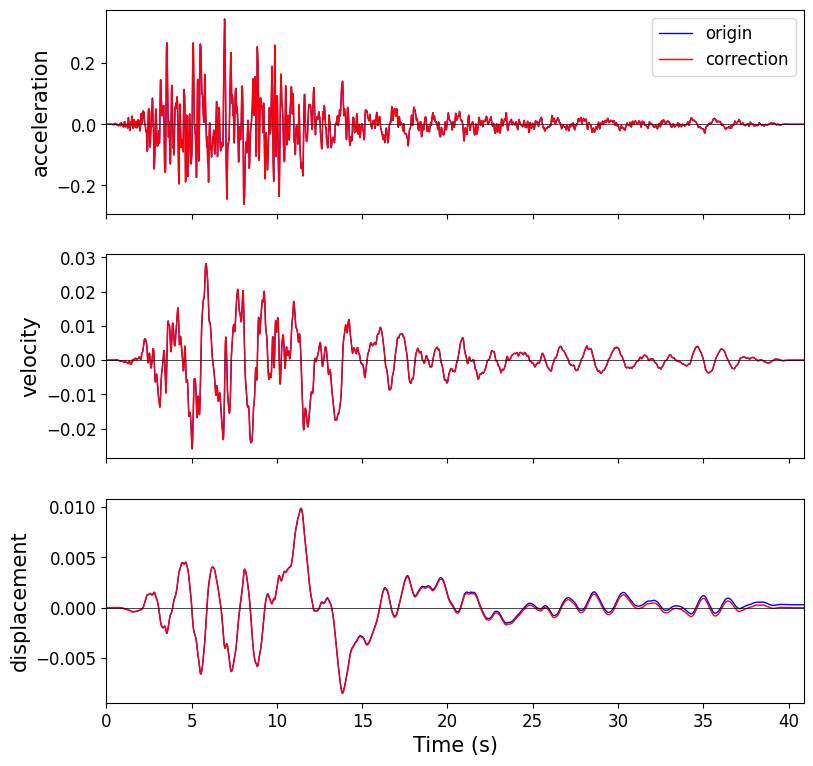

In [3]:
acc_corr, vel_corr, disp_corr = gm.baselinecorr(ts, acc, poly_degree=1, plot=True)

### Filtering

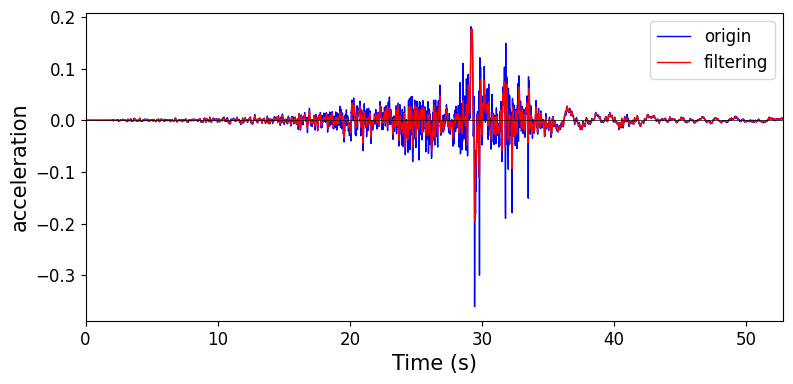

In [4]:
ts, acc = gm.load_gm_examples("ChiChi")
dt = ts[1] - ts[0]
acc2 = gm.freq_filt(
    dt,
    acc,
    ftype="Butterworth",  # 'Butterworth', 'Chebyshev', 'Bessel'
    btype="lowpass",  # 'lowpass', 'highpass', 'bandpass', 'bandstop'
    order=4,
    freq1=9,
    freq2=20,
    rp=3,
    plot=True,
)

### Resampling

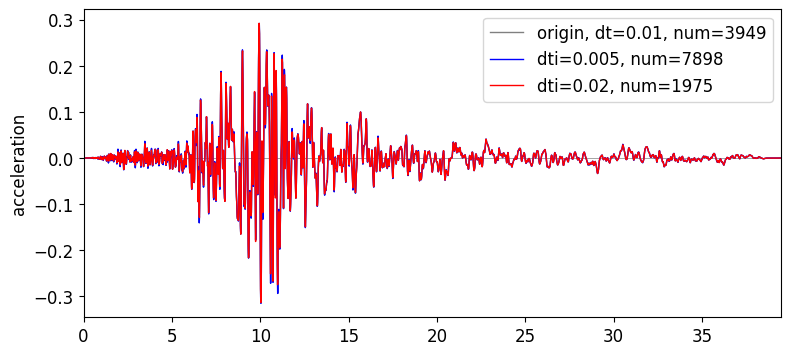

In [5]:
ts, acc = gm.load_gm_examples("Imperial_Valley")
dt = ts[1] - ts[0]
dtis = [dt / 2, 2 * dt]

colors = ["b", "r"]
fig, ax = plt.subplots(figsize=(9, 4))
ax.hlines(0, np.min(ts), np.max(ts), lw=0.5, colors="gray")
ax.plot(ts, acc, c="gray", lw=1, label=f"origin, dt={dt}, num={len(ts)}", alpha=1)
for i, dti in enumerate(dtis):
    ts2, acc2 = gm.resample(dt, acc, dti)
    ax.plot(ts2, acc2, c=colors[i], lw=1, alpha=1, label=f"dti={dti}, num={len(ts2)}")
ax.set_xlim(np.min(ts), np.max(ts))
ax.grid(False)
ax.set_ylabel("acceleration", fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.show()

## Linear Dynamic Time-History Analysis of SDOF System

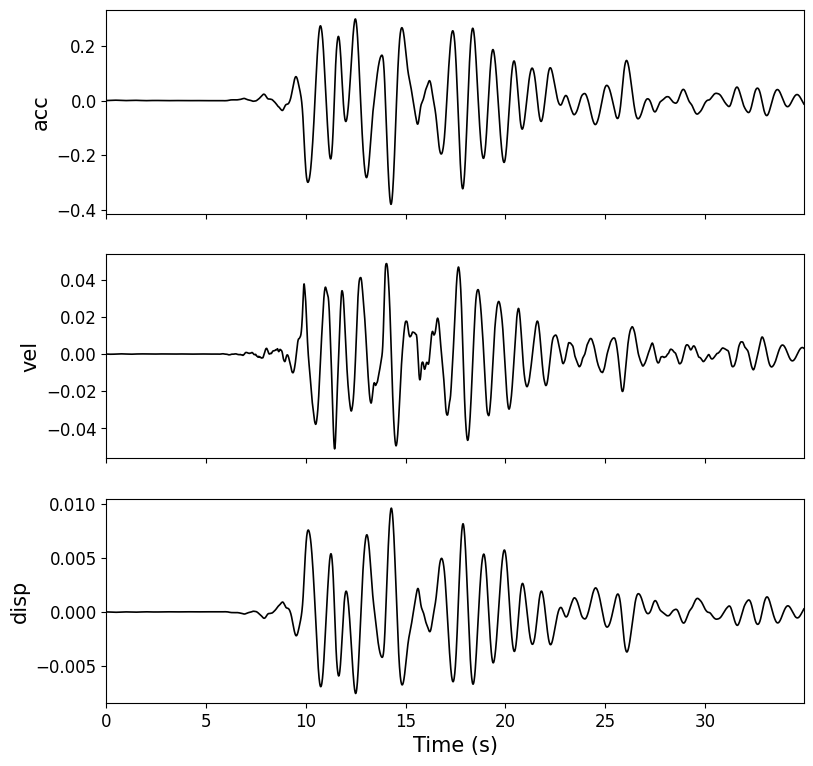

In [6]:
ts, acc = gm.load_gm_examples("Kocaeli")
dt = ts[1] - ts[0]
T = 1
omega = np.pi * 2 / T
u, v, d = gm.lida(dt, acc, omega=omega, damp_ratio=0.05, plot=True)

## SeismoGM ---Solving IMs, response spectra, etc.

In [7]:
ts, acc = gm.load_gm_examples("Northridge")
dt = ts[1] - ts[0]
# Or your own data

Instantiate the class where the arg ``unit`` is used to tell the program which unit your acceleration record is in.

Default: acc:g, vel=cm, disp=cm.

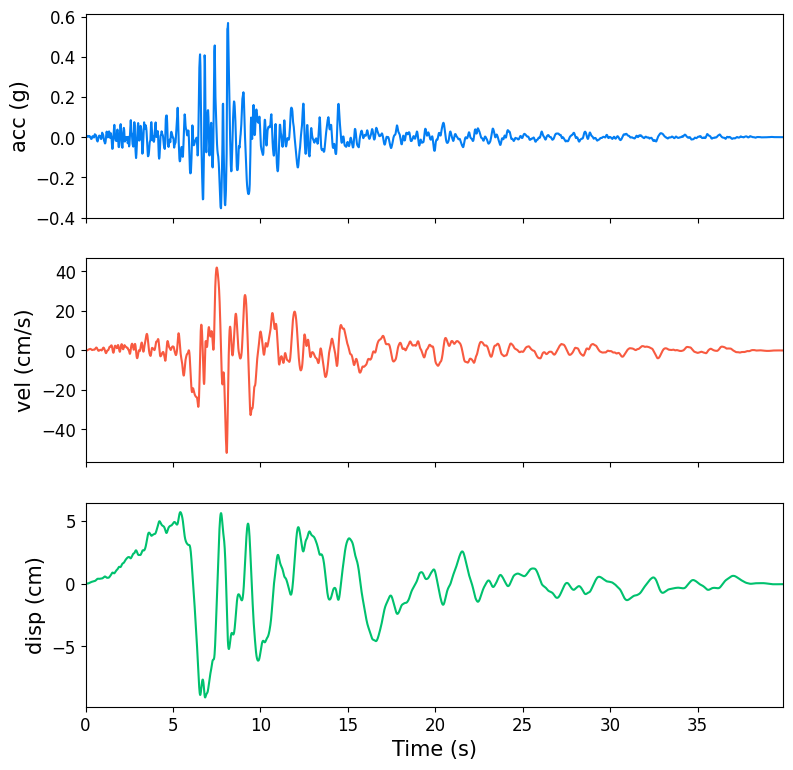

In [9]:
GM = gm.SeismoGM(dt=dt, acc=acc, unit="g")
GM.plot_hist()
plt.show()

acc-unit: m/s2;
vel-unit；m/s;
disp-unit: m

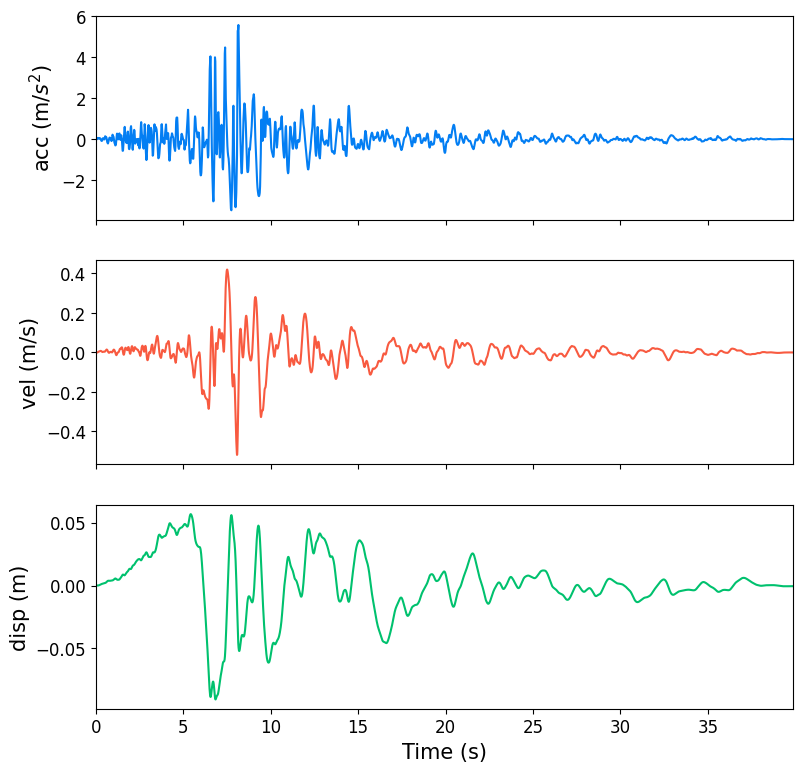

In [11]:
GM.set_units(acc="m", vel="m", disp="m")
GM.plot_hist()
plt.show()

### Get IMs independent of response spectra

In [12]:
ims = GM.get_ims(display_results=True)

┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ IM        ┃ Value  ┃         Unit         ┃                                           Name ┃
┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ PGA       │ 5.575  │         m/s2         │                       Peak ground acceleration │
│ PGV       │ 0.518  │         m/s          │                           Peak ground velocity │
│ PGD       │ 0.091  │          m           │                       Peak ground displacement │
│ V_A       │ 0.093  │          s           │                                        PGV/PGA │
│ D_V       │ 0.175  │          s           │                                        PGD/PGV │
│ EDA       │ 5.667  │         m/s2         │                  Effective Design Acceleration │
│ Ia        │ 2.732  │         m/s          │                                Arias Intensity │
│ Ima       │ 0.094  │         m/s          │                       Modified Arias Intensity │
│ MIV       │ 0.640  │         m/s          │                   Maximum Incremental Velocity │
│ Arms      │ 0.654  │         m/s2         │               Root-mean-square of acceleration │
│ Vrms      │ 0.073  │         m/s          │                   Root-mean-square of velocity │
│ Drms      │ 0.024  │          m           │               Root-mean-square of displacement │
│ Pa        │ 1.694  │       (m/s2)^2       │ Housner earthquake power index of acceleration │
│ Pv        │ 0.020  │       (m/s)^2        │     Housner earthquake power index of velocity │
│ Pd        │ 0.002  │        (m)^2         │ Housner earthquake power index of displacement │
│ Ra        │ 11.627 │     m/s2*s^(1/3)     │                  Riddell index of acceleration │
│ Rv        │ 1.346  │ (m/s)^(2/3)*s^(1/3)  │                      Riddell index of velocity │
│ Rd        │ 0.189  │      m*s^(1/3)       │                  Riddell index of displacement │
│ SED       │ 0.211  │         m2/s         │                        Specific Energy Density │
│ If        │ 0.900  │    (m/s)*s^(1/4)     │                                   Fajfar index │
│ Ic        │ 3.341  │ (m/s2)^(2/3)*s^(1/2) │                       Characteristic Intensity │
│ Icm       │ 5.905  │          --          │                     Cosenza–Manfredi Intensity │
│ CAV       │ 12.928 │         m/s          │                   Cumulative Absolute Velocity │
│ CAD       │ 1.578  │          m           │               Cumulative Absolute Displacement │
│ CAI       │ 0.627  │         m*s          │                    Cumulative Absolute Impetus │
│ CAVstd    │ 1.241  │         g*s          │       tandardized Cumulative Absolute Velocity │
│ Ip        │ 86.670 │          --          │                              Impulsivity Index │
│ Tsig_5_95 │ 9.070  │          s           │                5%-95% Arias intensity duration │
│ Tsig_5_75 │ 3.890  │          s           │                5%-75% Arias intensity duration │
│ Tbd       │ 23.080 │          s           │                             Bracketed duration │
│ Tud       │ 11.903 │          s           │                               Uniform duration │
└───────────┴────────┴──────────────────────┴────────────────────────────────────────────────┘

In [15]:
for item in ims.items():
    print(item[0], ":", float(item[1]))

PGA : 5.575023000000001
PGV : 0.5183260649999998
PGD : 0.09072516082500041
V_A : 0.09297290163645956
D_V : 0.1750349190427081
EDA : 5.6669942263120285
Ia : 2.7320996381985503
Ima : 0.09360928926548939
MIV : 0.6404996170998509
Arms : 0.6540196756420144
Vrms : 0.07273997267186642
Drms : 0.02381061445602853
Pa : 1.693560145177372
Pv : 0.020214270885704926
Pd : 0.00156964035732169
Ra : 11.626502583404948
Rv : 1.3456675966269116
Rd : 0.1892039399140948
SED : 0.21106212357348153
If : 0.8995076691517423
Ic : 3.340552019433777
Icm : 5.904674367226139
CAV : 12.928044735000002
CAD : 1.5784118079750014
CAI : 0.6272092149152453
CAVstd : 1.24146
Ip : 86.66987073603292
Tsig_5_95 : 9.070000000000002
Tsig_5_75 : 3.8899999999999997
Tbd : 23.080000000000002
Tud : 11.902774785219119


### Elastic response spectra, PSa, PSv, Sa, Sv, Sd

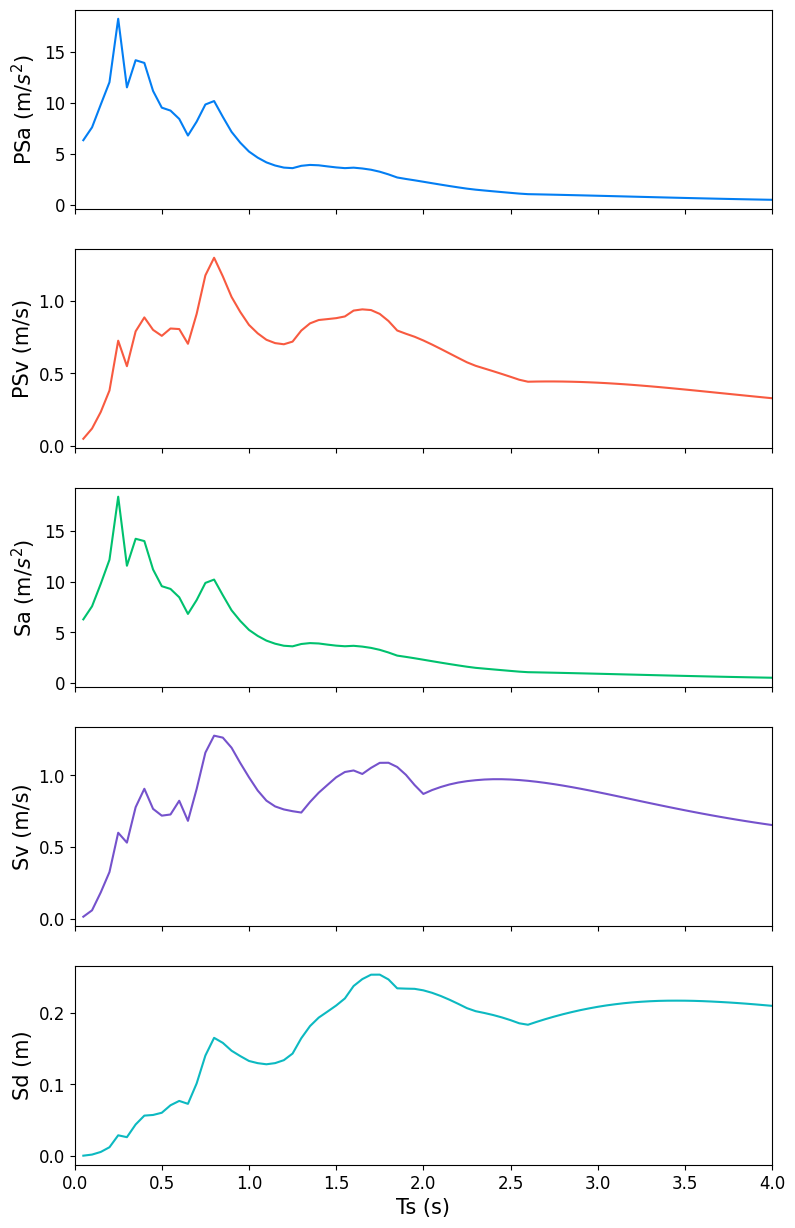

In [16]:
Ts = np.arange(0.05, 4.05, 0.05)
spectra = GM.get_elas_spec(Ts=Ts, damp_ratio=0.05, plot=True)
# PSa, PSv, Sa, Sv, Sd for each column

In [19]:
# PSa, PSv, Sa, Sv, Sd for each column
PSa = spectra[:, 0]

### Fourier magnitude and power spectra

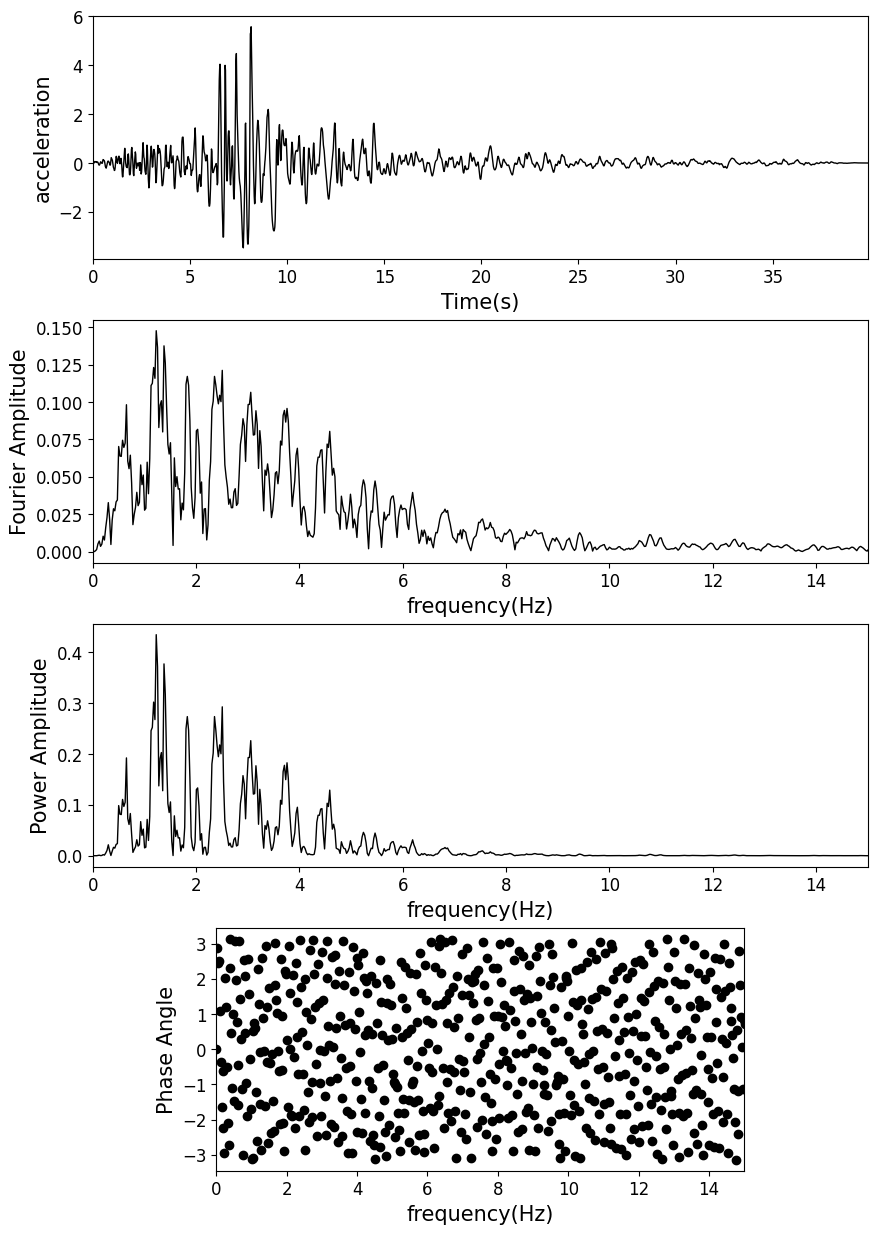

In [20]:
output = GM.get_fou_pow_spec(plot=True)

### Constant ductility response spectra

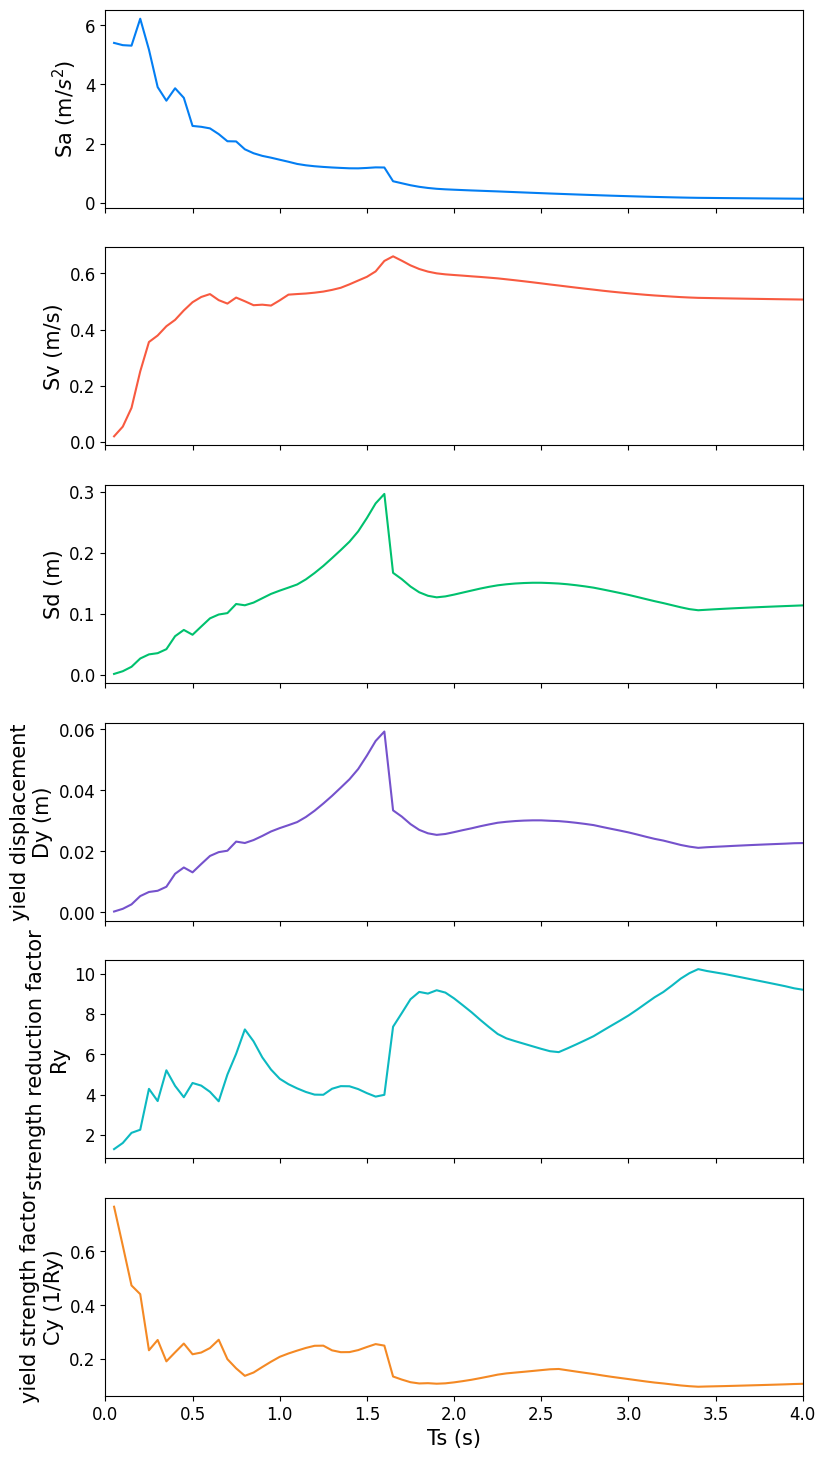

In [21]:
output = GM.get_const_duct_spec(
    Ts=Ts, harden_ratio=0.02, damp_ratio=0.05, mu=5, plot=True
)

### Other Response Spectra Related IMs

#### Spectral values at the first period of the structure

In [24]:
T1 = [0.5, 1.0, 1.5]
# T1 = 1.0
GM.get_elas_spec(Ts=T1)
# PSa, PSv, Sa, Sv, Sd for each column

array([[9.51717731, 0.75735291, 9.55247926, 0.71887891, 0.06026823],
       [5.23026124, 0.83242193, 5.24832196, 0.98596703, 0.13248406],
       [3.68121865, 0.87882622, 3.69676627, 0.98581644, 0.2098043 ]])

#### Cordova Intensity

In [25]:
GM.get_sac(T1=1.0)

np.float64(3.4821653265902692)

#### Vamvatsikos Intensity

In [26]:
GM.get_savam(T1=1, T2=0.75, T3=2)

np.float64(4.928740859475677)

#### Multiple-Period Intensity

In [27]:
GM.get_samp(T1=1, T2=0.75, m1=0.2, m2=0.1)

np.float64(6.479130184574305)

#### Average Spectral Acceleration, Velocity and Displacement

In [29]:
Tavg = np.arange(0.05, 4.05, 0.05)
GM.get_avgsavd(Tavg=Tavg)
# acceleration, velocity and displacement

array([2.31385417, 0.77242088, 0.13549942])

#### The peak of the response spectra

In [31]:
GM.get_savdp()
# acceleration, velocity and displacement

array([19.53279533,  1.31668864,  0.25365994])

#### Acceleration (ASI)，Velocity (VSI) and Displacement(DSI) Spectrum Intensity

In [32]:
GM.get_avdsi()
# acceleration, velocity and displacement

array([4.94275814, 2.10650197, 0.30703019])

#### Housner Spectra Intensity (HSI)

In [33]:
GM.get_hsi()

np.float64(0.762672126452001)

#### Effective peak acceleration (EPA), velocity (EPV) and displacement (EPD)

In [34]:
GM.get_epavd()

array([4.87394905, 0.3827573 , 0.08184794])

# Validated by SeismoSignal

## Velocity and displacement time-histories

## Elastic response spectra

## Const ductility response spectra